# **NLP Task**

## **Libraries & Load Dataset**

In [2]:
# Core Libraries
import pandas as pd
import numpy as np

# NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("merishnasuwal/aircraft-historical-maintenance-dataset")

print("Path to dataset files:", path)

100%|██████████| 107k/107k [00:00<00:00, 49.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/merishnasuwal/aircraft-historical-maintenance-dataset/versions/1


In [5]:
import os
print(os.listdir(path))



['Aircraft_Annotation_DataFile.csv', 'Aviation_TermBanks_Dataset.csv', 'Aviation_Abbreviation_Dataset.csv', 'Aviation_grammar_Dataset.csv', 'Aviation_Morphosyntactic_Dataset.csv']


In [6]:
csv_path = os.path.join(path, "Aircraft_Annotation_DataFile.csv")
df = pd.read_csv(csv_path)

df.head()


,IDENT,PROBLEM,ACTION
0,100001,ENGINE IDLE OVERRIDE KILLED ENGINE.,"TRIED TO ADJUST IDLE SEVERAL TIMES, WOULDN'T A..."
1,100002,ENGINE IDLE OVERRIDE KILLED ENGINE.,REMOVED & REPLACED FUEL SERVO
2,100003,ENGINE IDLE OVERRIDE KILLED ENGINE.,"A/C WAS RUN UP, SET IDLE SPEED, MIXTURE OK, NO..."
3,100004,HAD ENGINE CHOKE & BRIEFLY LOSE POWER ON DEPAR...,"PERFORMED ENGINE RUN UP, FOUND CYL 2 LOWER PLU..."
4,100005,#2 & 4 CYL ROCKER COVER GASKETS ARE LEAKING.,REMOVED & REPLACED GASKETS.


## **Preprocessing**

In [7]:
df.columns

Index(['IDENT', 'PROBLEM', 'ACTION'], dtype='object')

In [8]:
list_of_column_names = list(df.columns)

# displaying the list of column names
print('List of column names : ', list_of_column_names)

List of column names :  ['IDENT', 'PROBLEM', 'ACTION']


In [9]:
df['ACTION'][:5]

,ACTION
0,"TRIED TO ADJUST IDLE SEVERAL TIMES, WOULDN'T A..."
1,REMOVED & REPLACED FUEL SERVO
2,"A/C WAS RUN UP, SET IDLE SPEED, MIXTURE OK, NO..."
3,"PERFORMED ENGINE RUN UP, FOUND CYL 2 LOWER PLU..."
4,REMOVED & REPLACED GASKETS.


In [10]:
df['ACTION'].str.lower()

,ACTION
0,"tried to adjust idle several times, wouldn't a..."
1,removed & replaced fuel servo
2,"a/c was run up, set idle speed, mixture ok, no..."
3,"performed engine run up, found cyl 2 lower plu..."
4,removed & replaced gaskets.
...,...
6164,removed & replaced intake gasket.
6165,stop drilled crack.
6166,ops & leak ck good.
6167,found #2 cyl exhaust valve to be stuck. reamed...


In [14]:
import re
def remove_URL(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')  # Matches http/https URLs and www URLs
    return pattern.sub('', text)  # Replace matched URLs with an empty string

In [15]:
# Extract the last value as a string
text = df['ACTION'].tail(1).iloc[0]  # Use .iloc[0] to extract the string
cleaned_text = remove_URL(text)

print('Original Text: ', text)
print('Cleaned  Text: ', cleaned_text)

Original Text:  REVIEWED FLIGHT DATA, VERIFIED MAX RPM INSP
Cleaned  Text:  REVIEWED FLIGHT DATA, VERIFIED MAX RPM INSP


In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    else:
        return text  # Non-string entries are returned unchanged

In [20]:
df['ACTION_no_punct'] = df['ACTION'].apply(remove_punctuation)

# Preview
df[['ACTION', 'ACTION_no_punct']].head()


,ACTION,ACTION_no_punct
0,"TRIED TO ADJUST IDLE SEVERAL TIMES, WOULDN'T A...",TRIED TO ADJUST IDLE SEVERAL TIMES WOULDNT ADJUST
1,REMOVED & REPLACED FUEL SERVO,REMOVED REPLACED FUEL SERVO
2,"A/C WAS RUN UP, SET IDLE SPEED, MIXTURE OK, NO...",AC WAS RUN UP SET IDLE SPEED MIXTURE OK NO LEA...
3,"PERFORMED ENGINE RUN UP, FOUND CYL 2 LOWER PLU...",PERFORMED ENGINE RUN UP FOUND CYL 2 LOWER PLUG...
4,REMOVED & REPLACED GASKETS.,REMOVED REPLACED GASKETS


In [22]:
df['ACTION'] = df['ACTION'].apply(remove_punctuation)
df['ACTION'].head()

,ACTION
0,TRIED TO ADJUST IDLE SEVERAL TIMES WOULDNT ADJUST
1,REMOVED REPLACED FUEL SERVO
2,AC WAS RUN UP SET IDLE SPEED MIXTURE OK NO LEA...
3,PERFORMED ENGINE RUN UP FOUND CYL 2 LOWER PLUG...
4,REMOVED REPLACED GASKETS


In [23]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [25]:

def remove_stopwords(text):
    # Tokenize the input text
    words = word_tokenize(text)

    # Get the stop words list for English
    stop_words = set(stopwords.words('english'))

    # Filter out stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    return ' '.join(filtered_words)

In [26]:
df['ACTION'] = df['ACTION'].apply(remove_stopwords)
df['ACTION'].head()

,ACTION
0,TRIED ADJUST IDLE SEVERAL TIMES WOULDNT ADJUST
1,REMOVED REPLACED FUEL SERVO
2,AC RUN SET IDLE SPEED MIXTURE OK LEAKS
3,PERFORMED ENGINE RUN FOUND CYL 2 LOWER PLUG FO...
4,REMOVED REPLACED GASKETS


## **Tokenization**

In [43]:
from nltk.tokenize import word_tokenize

In [27]:

df['tokens'] = df['ACTION'].astype(str).apply(word_tokenize)
df[['ACTION', 'tokens']].head()


,ACTION,tokens
0,TRIED ADJUST IDLE SEVERAL TIMES WOULDNT ADJUST,"[TRIED, ADJUST, IDLE, SEVERAL, TIMES, WOULDNT,..."
1,REMOVED REPLACED FUEL SERVO,"[REMOVED, REPLACED, FUEL, SERVO]"
2,AC RUN SET IDLE SPEED MIXTURE OK LEAKS,"[AC, RUN, SET, IDLE, SPEED, MIXTURE, OK, LEAKS]"
3,PERFORMED ENGINE RUN FOUND CYL 2 LOWER PLUG FO...,"[PERFORMED, ENGINE, RUN, FOUND, CYL, 2, LOWER,..."
4,REMOVED REPLACED GASKETS,"[REMOVED, REPLACED, GASKETS]"


## **Stemming & Lemmatization**

In [28]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming
df['stemmed'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

# Lemmatization
df['lemmatized']= df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

df[['tokens', 'stemmed', 'lemmatized']].head()


,tokens,stemmed,lemmatized
0,"[TRIED, ADJUST, IDLE, SEVERAL, TIMES, WOULDNT,...","[tri, adjust, idl, sever, time, wouldnt, adjust]","[TRIED, ADJUST, IDLE, SEVERAL, TIMES, WOULDNT,..."
1,"[REMOVED, REPLACED, FUEL, SERVO]","[remov, replac, fuel, servo]","[REMOVED, REPLACED, FUEL, SERVO]"
2,"[AC, RUN, SET, IDLE, SPEED, MIXTURE, OK, LEAKS]","[ac, run, set, idl, speed, mixtur, ok, leak]","[AC, RUN, SET, IDLE, SPEED, MIXTURE, OK, LEAKS]"
3,"[PERFORMED, ENGINE, RUN, FOUND, CYL, 2, LOWER,...","[perform, engin, run, found, cyl, 2, lower, pl...","[PERFORMED, ENGINE, RUN, FOUND, CYL, 2, LOWER,..."
4,"[REMOVED, REPLACED, GASKETS]","[remov, replac, gasket]","[REMOVED, REPLACED, GASKETS]"


## **Feature Extraction**

In [31]:
# Join tokens into strings
df['stemmed_str'] = df['stemmed'].apply(lambda tokens: ' '.join(tokens))
df['lemmatized_str'] = df['lemmatized'].apply(lambda tokens: ' '.join(tokens))

# Then use those new columns with CountVectorizer
X_stem = vectorizer_stem.fit_transform(df['stemmed_str'])
X_lemma = vectorizer_lemma.fit_transform(df['lemmatized_str'])


## **Modeling**

In [33]:
# This is only an example target; adjust for your real ML task/labels
df['target'] = df['ACTION'].str.contains('replace|install|change', case=False, na=False).astype(int)
y = df['target']
y.value_counts()


,count
target,
1,4229
0,1940


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
X_train_s, X_test_s, y_train, y_test = train_test_split(X_stem, y, test_size=0.2, random_state=42)
X_train_l, X_test_l, _, _ = train_test_split(X_lemma, y, test_size=0.2, random_state=42)



In [41]:
# Logistic Regression
lr_stem = LogisticRegression(max_iter=200)
lr_stem.fit(X_train_s, y_train)
pred_lr_stem = lr_stem.predict(X_test_s)

lr_lemma = LogisticRegression(max_iter=200)
lr_lemma.fit(X_train_l, y_train)
pred_lr_lemma = lr_lemma.predict(X_test_l)

# Multinomial Naive Bayes
nb_stem = MultinomialNB()
nb_stem.fit(X_train_s, y_train)
pred_nb_stem = nb_stem.predict(X_test_s)

nb_lemma = MultinomialNB()
nb_lemma.fit(X_train_l, y_train)
pred_nb_lemma = nb_lemma.predict(X_test_l)



## **Evaluation**


==== Logistic Regression (Stemming) ====
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       396
           1       1.00      0.99      1.00       838

    accuracy                           0.99      1234
   macro avg       0.99      0.99      0.99      1234
weighted avg       0.99      0.99      0.99      1234



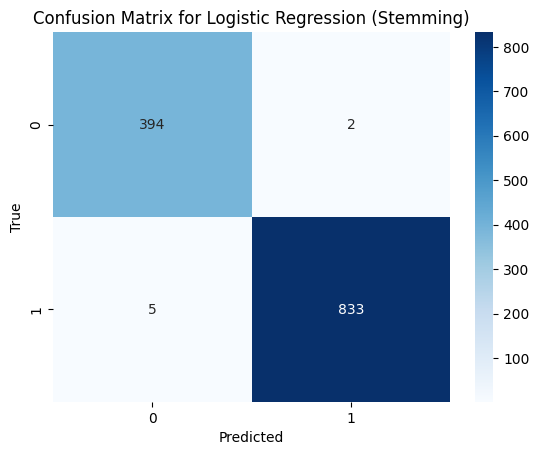


==== Logistic Regression (Lemmatization) ====
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       396
           1       1.00      0.99      0.99       838

    accuracy                           0.99      1234
   macro avg       0.99      0.99      0.99      1234
weighted avg       0.99      0.99      0.99      1234



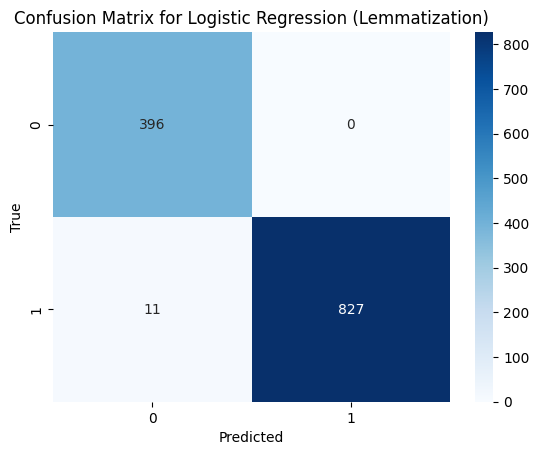


==== Naive Bayes (Stemming) ====
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       396
           1       0.96      0.98      0.97       838

    accuracy                           0.96      1234
   macro avg       0.96      0.95      0.95      1234
weighted avg       0.96      0.96      0.96      1234



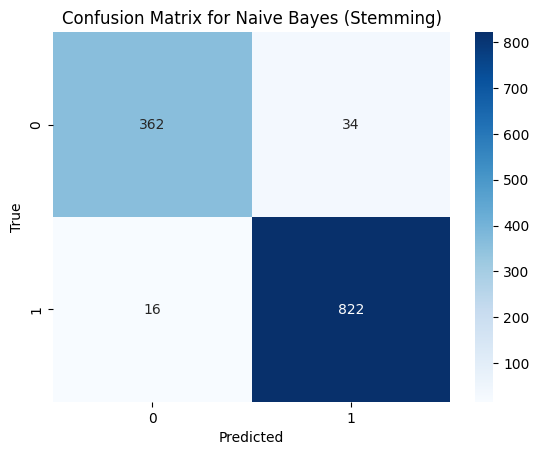


==== Naive Bayes (Lemmatization) ====
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       396
           1       0.95      0.98      0.97       838

    accuracy                           0.95      1234
   macro avg       0.95      0.94      0.94      1234
weighted avg       0.95      0.95      0.95      1234



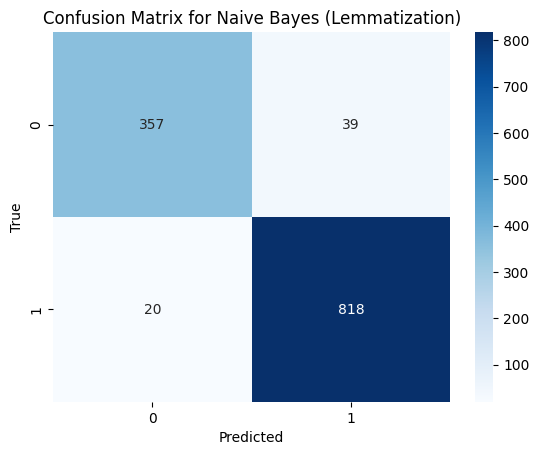

In [42]:
def print_results(model_name, y_true, y_pred):
    print(f"\n==== {model_name} ====")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Logistic Regression
print_results("Logistic Regression (Stemming)", y_test, pred_lr_stem)
print_results("Logistic Regression (Lemmatization)", y_test, pred_lr_lemma)

# Multinomial Naive Bayes
print_results("Naive Bayes (Stemming)", y_test, pred_nb_stem)
print_results("Naive Bayes (Lemmatization)", y_test, pred_nb_lemma)

